<a href="https://colab.research.google.com/github/22Ifeoma22/22Ifeoma22/blob/main/08_FunctionalModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Heart Disease classification

### Importing Libraries

In [3]:
from datetime import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

### Understanding the dataset

Dataset : https://www.kaggle.com/ronitf/heart-disease-uci

Columns:
    - age: age in years
    - sex: (1 = male; 0 = female)
    - cp: chest pain type
    - trestbps: resting blood pressure (in mm Hg on admission to the hospital)
    - chol: serum cholestoral in mg/dl
    - fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    - restecg: resting electrocardiographic results
    - thalach: maximum heart rate achieved
    - exang: exercise induced angina (1 = yes; 0 = no)
    - oldpeak: ST depression induced by exercise relative to rest
    - slope: the slope of the peak exercise ST segment
    - ca: number of major vessels (0-3) colored by flourosopy
    - thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
df = pd.read_csv("/content/sample_data/heart.csv")

df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
226,62,1,1,120,281,0,0,103,0,1.4,1,1,3,0
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


In [5]:
df.shape

(303, 14)

In [ ]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df['sex'].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [14]:
df['cp'].value_counts()

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

### Data VIsualization

#### 1) Sex

In [15]:
sns.countplot('sex', hue = 'target', data = df)

plt.title('Heart Disease Frequency for Gender')
plt.legend(["No Disease", "Yes Disease"])

plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()

TypeError: countplot() got multiple values for argument 'data'

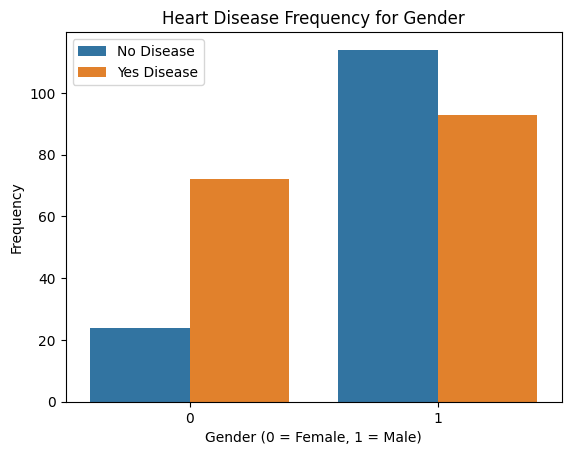

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sex', hue='target', data=df)

plt.title('Heart Disease Frequency for Gender')
plt.legend(["No Disease", "Yes Disease"])
plt.xlabel('Gender (0 = Female, 1 = Male)')
plt.ylabel('Frequency')

plt.show()


#### 2) Age

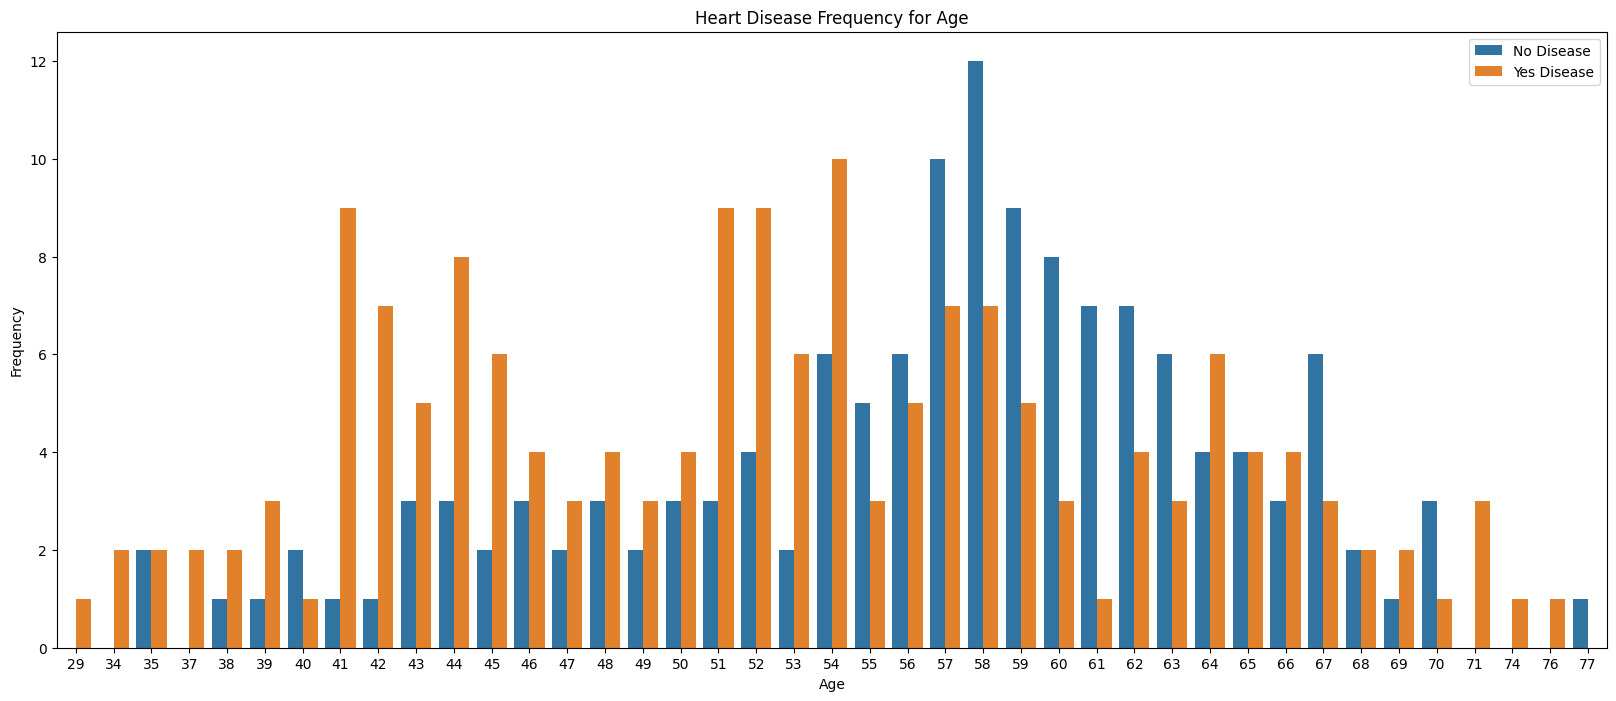

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
sns.countplot(x='age', hue='target', data=df)

plt.title('Heart Disease Frequency for Age')
plt.legend(["No Disease", "Yes Disease"])
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.show()


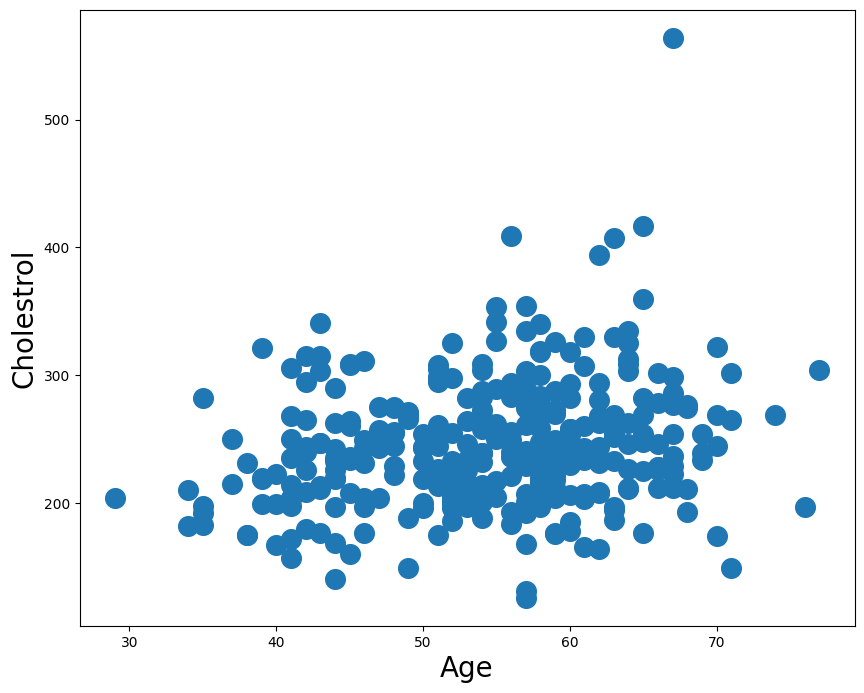

In [19]:
plt.figure(figsize = (10, 8))

plt.scatter(df['age'], df['chol'], s = 200)

plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestrol', fontsize = 20)
plt.show()

### Splitting the data

In [ ]:
features = df.drop('target', axis=1)

target = df[['target']]

In [ ]:
features.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
145,70,1,1,156,245,0,0,143,0,0.0,2,0,2
30,41,0,1,105,198,0,1,168,0,0.0,2,1,2
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3


In [ ]:
target.sample(10)

,target
299,0
26,1
2,1
254,0
87,1
142,1
138,1
243,0
218,0
177,0


In [ ]:
categorical_features = features[['sex', 'fbs', 'exang', 'cp', 'ca', 'slope', 'thal', 'restecg']].copy()

categorical_features.head()

,sex,fbs,exang,cp,ca,slope,thal,restecg
0,1,1,0,3,0,0,1,0
1,1,0,0,2,0,0,2,1
2,0,0,0,1,0,2,2,0
3,1,0,0,1,0,2,2,1
4,0,0,1,0,0,2,2,1


In [ ]:
numeric_features = features[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].copy()

numeric_features.head()

,age,trestbps,chol,thalach,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [ ]:
standardScaler = StandardScaler()

numeric_features = pd.DataFrame(standardScaler.fit_transform(numeric_features),
                                columns=numeric_features.columns,
                                index=numeric_features.index)

numeric_features.describe()

,age,trestbps,chol,thalach,oldpeak
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,5.825923e-17,-7.146832e-16,-9.828955e-17,-5.203025e-16,-3.140136e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-2.148802e+00,-2.324160e+00,-3.439267e+00,-8.968617e-01
25%,-7.572802e-01,-6.638668e-01,-6.814943e-01,-7.061105e-01,-8.968617e-01
50%,6.988599e-02,-9.273778e-02,-1.210553e-01,1.466343e-01,-2.067053e-01
75%,7.316189e-01,4.783913e-01,5.456738e-01,7.151309e-01,4.834512e-01
max,2.496240e+00,3.905165e+00,6.140401e+00,2.289429e+00,4.451851e+00


In [ ]:
processed_features = pd.concat([numeric_features, categorical_features], axis=1,
                               sort=False)

processed_features.head()

,age,trestbps,chol,thalach,oldpeak,sex,fbs,exang,cp,ca,slope,thal,restecg
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,1,0,3,0,0,1,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,0,2,0,0,2,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,0,0,0,1,0,2,2,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,0,1,0,2,2,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,0,0,1,0,0,2,2,1


### Splitting dataset into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state=1)

In [ ]:
x_train.shape, y_train.shape

((242, 13), (242, 1))

In [ ]:
x_test.shape, y_test.shape

((61, 13), (61, 1))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train,
                                                  y_train,
                                                  test_size=0.15,
                                                  random_state=10)

In [ ]:
x_train.shape, x_val.shape, x_test.shape

((205, 13), (37, 13), (61, 13))

In [ ]:
y_train.shape, y_val.shape, y_test.shape

((205, 1), (37, 1), (61, 1))

### Building the model

In [ ]:
def build_model():

    inputs = tf.keras.Input(shape=(x_train.shape[1],))

    dense_layer1 = layers.Dense(12, activation='relu')
    x = dense_layer1(inputs)

    dropout_layer = layers.Dropout(0.3)
    x = dropout_layer(x)

    dense_layer2 = layers.Dense(8, activation='relu')
    x = dense_layer2(x)

    predictions_layer = layers.Dense(1, activation='sigmoid')
    predictions = predictions_layer(x)

    model = tf.keras.Model(inputs=inputs, outputs=predictions)

    model.summary()

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss=tf.keras.losses.BinaryCrossentropy(),
                  metrics=['accuracy',
                           tf.keras.metrics.Precision(0.5),
                           tf.keras.metrics.Recall(0.5),])
    return model

In [ ]:
model = build_model()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dropout (Dropout)            (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________


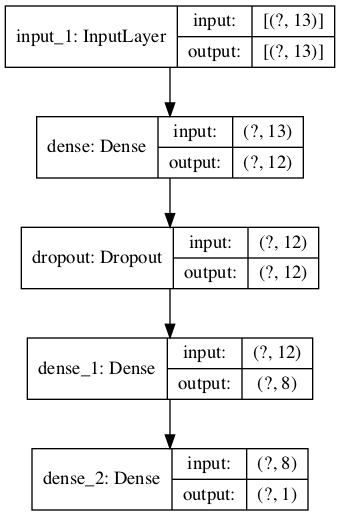

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
dataset_train = tf.data.Dataset.from_tensor_slices((x_train.values, y_train.values))
dataset_train = dataset_train.batch(16)

dataset_train.shuffle(128)

<ShuffleDataset shapes: ((None, 13), (None, 1)), types: (tf.float64, tf.int64)>

In [ ]:
num_epochs = 100

In [ ]:
dataset_val = tf.data.Dataset.from_tensor_slices((x_val.values, y_val.values))
dataset_val = dataset_val.batch(16)

In [ ]:
model = build_model()

training_history = model.fit(dataset_train, epochs=num_epochs, validation_data=dataset_val)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 12)                168       
_________________________________________________________________
dropout_3 (Dropout)          (None, 12)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 281
Trainable params: 281
Non-trainable params: 0
_________________________________________________________________
Train for 13 steps, validate for 3 steps
Epoch 1/100
13/13 [==============================] - 2s 120ms/step - loss: 0.6648 - ac

Epoch 32/100
13/13 [==============================] - 0s 10ms/step - loss: 0.3917 - accuracy: 0.8390 - precision_3: 0.8462 - recall_3: 0.8684 - val_loss: 0.5606 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 33/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3858 - accuracy: 0.8439 - precision_3: 0.8475 - recall_3: 0.8772 - val_loss: 0.5608 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 34/100
13/13 [==============================] - 0s 6ms/step - loss: 0.4214 - accuracy: 0.8244 - precision_3: 0.8145 - recall_3: 0.8860 - val_loss: 0.5588 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 35/100
13/13 [==============================] - 0s 21ms/step - loss: 0.4124 - accuracy: 0.8293 - precision_3: 0.8264 - recall_3: 0.8772 - val_loss: 0.5516 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 36/100
13/13 [==============================] - 0s 5ms/step - lo

13/13 [==============================] - 0s 5ms/step - loss: 0.3331 - accuracy: 0.8732 - precision_3: 0.8607 - recall_3: 0.9211 - val_loss: 0.5229 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 68/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3471 - accuracy: 0.8537 - precision_3: 0.8281 - recall_3: 0.9298 - val_loss: 0.5227 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 69/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2875 - accuracy: 0.8976 - precision_3: 0.8780 - recall_3: 0.9474 - val_loss: 0.5256 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 70/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.8537 - precision_3: 0.8387 - recall_3: 0.9123 - val_loss: 0.5291 - val_accuracy: 0.7568 - val_precision_3: 0.7391 - val_recall_3: 0.8500
Epoch 71/100
13/13 [==============================] - 0s 5ms/step - loss: 0.3301 - ac

### Plotting accuracy

In [ ]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'precision_3', 'recall_3', 'val_loss', 'val_accuracy', 'val_precision_3', 'val_recall_3'])

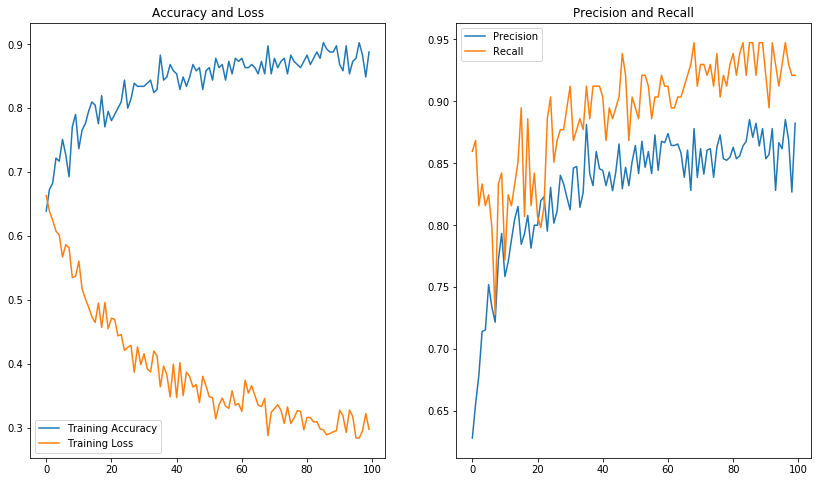

In [ ]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['precision_3']
recall = training_history.history['recall_3']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Accuracy and Loss')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Precision')
plt.plot(epochs_range, recall, label='Recall')

plt.title('Precision and Recall')
plt.legend()

### Model evaluation

In [ ]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

61/61 [==============================] - 0s 124us/sample - loss: 0.6122 - accuracy: 0.7213 - precision_3: 0.6944 - recall_3: 0.8065


loss           0.612176
accuracy       0.721311
precision_3    0.694444
recall_3       0.806452
dtype: float64

### Prediction

In [ ]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.00197199],
       [0.81554806],
       [0.01283713],
       [0.01124453],
       [0.01313632],
       [0.00781236],
       [0.00609795],
       [0.2748118 ],
       [0.00384647],
       [0.9806064 ]], dtype=float32)

In [ ]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [ ]:
y_pred[:10]

array([[0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
pred_results = pd.DataFrame({'y_test': y_test.values.flatten(),
                             'y_pred': y_pred.flatten().astype('int32') }, index = range(len(y_pred)))

In [ ]:
pred_results.sample(10)

,y_test,y_pred
13,0,1
12,0,1
49,1,1
53,1,1
42,1,0
2,0,0
30,1,1
48,0,1
5,0,0
40,1,1


In [ ]:
pd.crosstab(pred_results.y_pred, pred_results.y_test)

y_test,0,1
y_pred,,
0,19,6
1,11,25


In [ ]:
accuracy_score(y_test, y_pred)

0.7213114754098361

In [ ]:
precision_score(y_test, y_pred)

0.6944444444444444

In [ ]:
recall_score(y_test, y_pred)

0.8064516129032258